# Correlation with California Average Yearly High Temperatures 1992 - 2020

In [1]:
# Import Libraries

# ML Basics plus sqlite3
import pandas as pd
import numpy as np
import sqlite3

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Sci-Kit Learn Libraries
from sklearn.preprocessing import StandardScaler

# Misc
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Our updated dataframe
fires_df = pd.read_csv('Data/Updated CA Wildfire Database.csv')
# California historic temps from Extremeweatherwatch.com
ca_hist_temps = pd.read_html('https://www.extremeweatherwatch.com/states/california/average-temperature-by-year')
# Convert array to dataframe
ca_hist_temps = pd.DataFrame(ca_hist_temps[0])
# Year to datetime object
ca_hist_temps['Year'] = pd.to_datetime(ca_hist_temps['Year'], format='%Y')
ca_hist_temps.set_index('Year', inplace= True)
ca_hist_temps.sort_index(inplace= True)
# Keep only high temps
ca_hist_temps.drop(columns=['Rank', 'Low (°F)'], inplace= True)
# Date range of our wildfire data
ca_hist_temps = ca_hist_temps.loc['1992-01-01':'2020-01-01']

# Average damage per year
avg_dmg_by_year = fires_df.groupby(['FIRE_YEAR'])[['FIRE_SIZE']].mean().reset_index()
# Year to datetime object
avg_dmg_by_year['FIRE_YEAR'] = pd.to_datetime(avg_dmg_by_year['FIRE_YEAR'], format='%Y')
# Align the datetimes of our two dataframes
avg_dmg_by_year = avg_dmg_by_year.set_index('FIRE_YEAR').sort_index()

# Create a new dataframe with historic average high temps and average yearly fire size
ca_fire_temps = pd.concat([ca_hist_temps, avg_dmg_by_year], axis= 1)

In [3]:
# Scale and rename features
scaler = StandardScaler()
ca_fire_temps[['High (°F)', 'FIRE_SIZE']] = scaler.fit_transform(ca_fire_temps[['High (°F)', 'FIRE_SIZE']])
ca_fire_temps.rename(columns={'High (°F)':'Avg_Hi_Temp(F)', 'FIRE_SIZE':'Avg_Fire_Size'}, inplace= True)

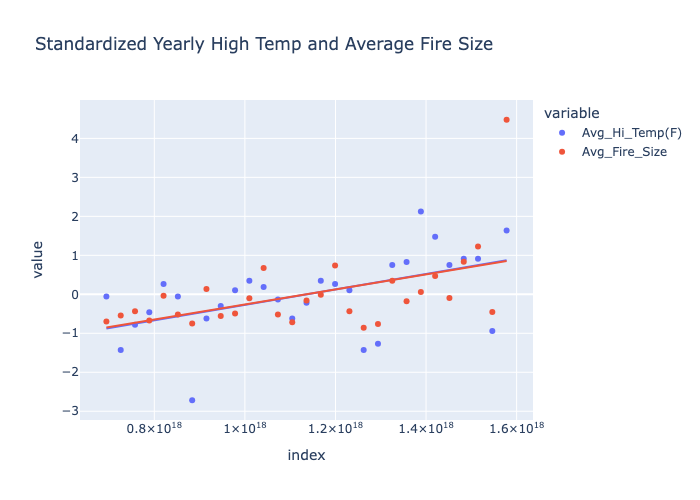

In [4]:
# Quick regression for both high temps and fire size
figure = px.scatter(ca_fire_temps, trendline= 'ols', title='Standardized Yearly High Temp and Average Fire Size')
figure.show('png')

It's pretty remarkable that average high temperatures and average fire size have almost the exact same OLS Regression Lines. This suggests a fairly high correlation. Let's check on that theory.

In [5]:
# Correlation between Average High Temperatures and Average Fire Size
ca_fire_temps.corr()

,Avg_Hi_Temp(F),Avg_Fire_Size
Avg_Hi_Temp(F),1.000000,0.587784
Avg_Fire_Size,0.587784,1.000000
